In [1]:
!export CUDA_VISIBLE_DEVICES=3

In [2]:
import os
import sys
import argparse
import time
from datetime import datetime
import glob
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import DataLoader

from conf import settings
from utils import (
    get_network,
)

/home/pzzhao/miniconda3/envs/default/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


allocated device: cuda:0


In [3]:
args_d = {"net": "resnet101", "gpu":True}
args = argparse.Namespace(**args_d)

In [4]:
model_paths = [
    '/home/pzzhao/repos/pytorch-cifar100-practice/checkpoint/resnet101/fri1555_16base',
    '/home/pzzhao/repos/pytorch-cifar100-practice/checkpoint/resnet101/fri2345_16nms',
    '/home/pzzhao/repos/pytorch-cifar100-practice/checkpoint/resnet101/fri2348_16mns',
    '/home/pzzhao/repos/pytorch-cifar100-practice/checkpoint/resnet101/fri1600_16nmns'
]

In [5]:
models = []
for path in model_paths:
    models.append(get_network(args))

In [6]:
names = []
for idx in range(len(model_paths)):
    path = model_paths[idx]
    name = path.split("/")[-1]
    names.append(name)
    if path[-1] != "/":
        path += "/"
    ckpts = glob.glob(path + "*best.pth")
    ckpts.sort(reverse=True)
    cur_ckpt = ckpts[0]
    print(f"> get cur ckpt {cur_ckpt}")
    checkpoint = torch.load(cur_ckpt)
    models[idx].load_state_dict(checkpoint)

> get cur ckpt /home/pzzhao/repos/pytorch-cifar100-practice/checkpoint/resnet101/fri1555_16base/resnet101-179-best.pth
> get cur ckpt /home/pzzhao/repos/pytorch-cifar100-practice/checkpoint/resnet101/fri2345_16nms/resnet101-177-best.pth
> get cur ckpt /home/pzzhao/repos/pytorch-cifar100-practice/checkpoint/resnet101/fri2348_16mns/resnet101-182-best.pth
> get cur ckpt /home/pzzhao/repos/pytorch-cifar100-practice/checkpoint/resnet101/fri1600_16nmns/resnet101-177-best.pth


In [7]:
k = 114

img_dir = f"/home/pzzhao/repos/pytorch-cifar100-practice/cifar100_images/"
img_nms = glob.glob(img_dir + f"*.png")
img_nms.sort()
img_sample_nm = img_nms[k]
print(f"get image sample {img_sample_nm}")
img_sample = Image.open(img_sample_nm)

get image sample /home/pzzhao/repos/pytorch-cifar100-practice/cifar100_images/1102_label_80.png


In [8]:
# Define the transformations to apply to the images
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
])
img_sample_ts = transform(img_sample).unsqueeze(0)
if args.gpu:
    img_sample_ts = img_sample_ts.cuda()

In [9]:
outs = []
for idx in range(len(models)):
    outs.append(models[idx](img_sample_ts))

In [12]:
# outs

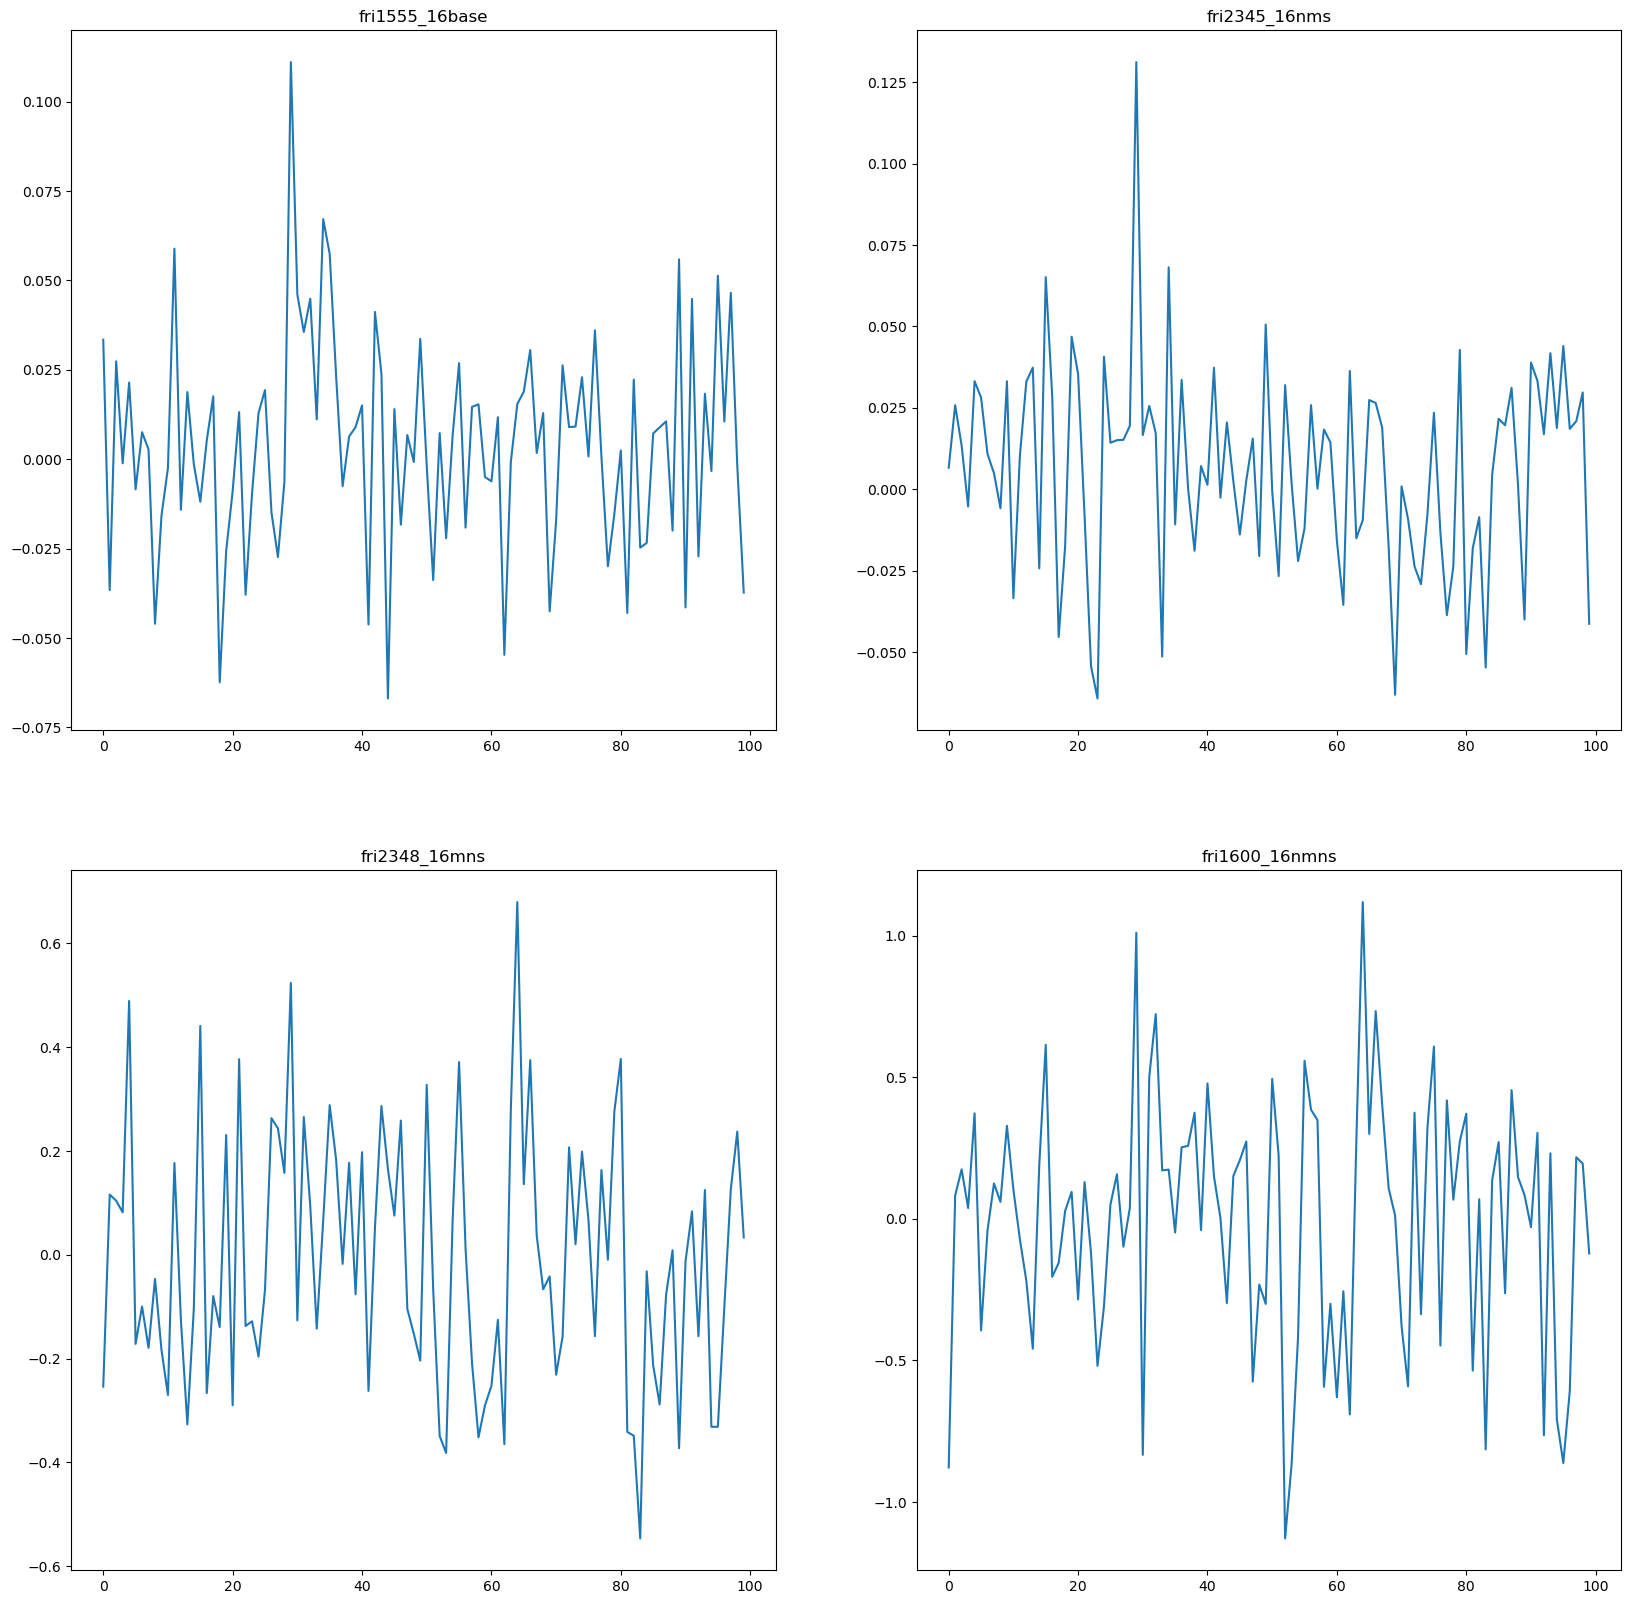

In [11]:
import math
tot_plots = len(outs)
sqrt = math.ceil(math.sqrt(tot_plots))
height = math.ceil(tot_plots / sqrt)

# fig, axes = plt.subplots(nrows=height, ncols=sqrt, figsize=(sqrt*10, height*10))
plt.figure(figsize=(sqrt*10, height*10))
for idx in range(tot_plots):
    plt.subplot(height, sqrt, idx+1)
    cur_arr = outs[idx].squeeze(0).cpu().detach().numpy()
    plt.plot(cur_arr)
    plt.title(names[idx])
plt.show()